<a href="https://colab.research.google.com/github/ZehanQin/ECON5200-Applied-Data-Analytics-in-Econ/blob/main/Assignment%201/Econ_5200_Assignment_1_Zehan_Qin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
student_basket = [
    {'Item': 'Tuition', 'Price_2016':45000, 'Price_2024': 58000},
    {'Item': 'Rent (1 Bed)', 'Price_2016': 1200, 'Price_2024': 1800},
    {'Item': 'Chipotle Burrito', 'Price_2016': 7.50, 'Price_2024': 11.50},
    {'Item': 'Spotify', 'Price_2016':9.99, 'Price_2024': 11.99},
]

In [2]:
def calculate_inflation(base, current):
  return ((current-base)/base)*100

for item in student_basket:
  rate = calculate_inflation(item['Price_2016'], item['Price_2024'])
  print(f"{item['Item']}: {rate:.2f}% Inflation")

Tuition: 28.89% Inflation
Rent (1 Bed): 50.00% Inflation
Chipotle Burrito: 53.33% Inflation
Spotify: 20.02% Inflation


In [3]:
!pip install fredapi
from fredapi import Fred
fred= Fred(api_key='5bbdb79514a016ad379601c49181d548')

official_cpi = fred.get_series('CPIAUCSL')
tuition = fred.get_series('CUSR0000SEEB')
rent = fred.get_series('CUSR0000SEHA')
food_away_from_home = fred.get_series('CUSR0000SEFV')
cable_streaming_tv = fred.get_series('CUSR0000SERA02')

In [4]:
import pandas as pd

df=pd.DataFrame({
    'Official_CPI': official_cpi,
    'Tuition': tuition,
    'Rent': rent,
    'Food_Away_Home': food_away_from_home,
    'Cable_Stream_TV': cable_streaming_tv,
})

df= df.dropna()

base = df.loc['2016-01-01':].iloc[0]
df_index=(df/base)*100

df_index.loc['2016-01-01']

,2016-01-01
Official_CPI,100.0
Tuition,100.0
Rent,100.0
Food_Away_Home,100.0
Cable_Stream_TV,100.0


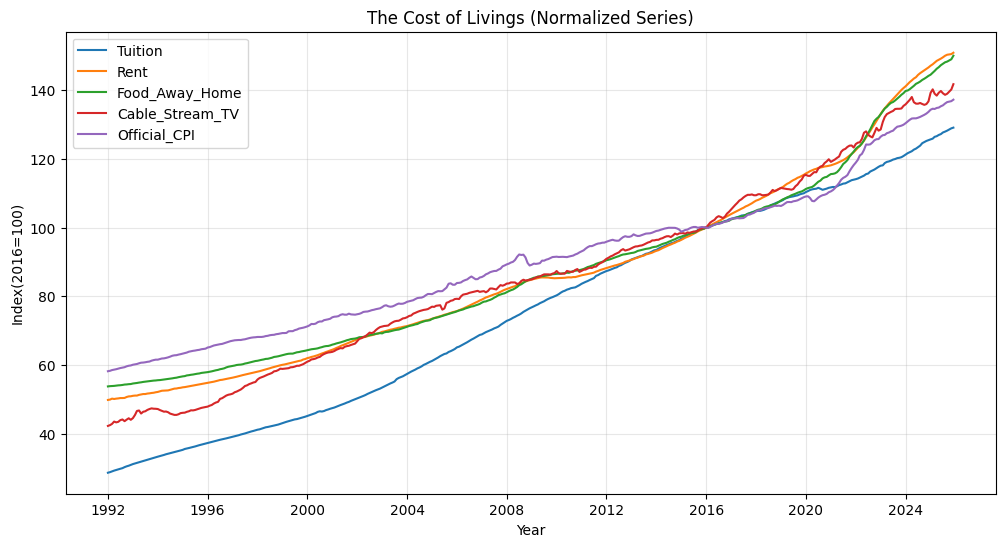

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(df_index.index, df_index['Tuition'],label='Tuition')
plt.plot(df_index.index, df_index['Rent'],label='Rent')
plt.plot(df_index.index, df_index["Food_Away_Home"], label='Food_Away_Home')
plt.plot(df_index.index, df_index['Cable_Stream_TV'], label="Cable_Stream_TV")
plt.plot(df_index.index, df_index["Official_CPI"],label='Official_CPI')

plt.title('The Cost of Livings (Normalized Series)')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Index(2016=100)')
plt.grid(True, alpha=0.3)
plt.show ()

In [6]:
Weight_Dict = {
    'Tuition': 0.45,
    'Rent': 0.25,
    'Food_Away_Home': 0.25,
    'Cable_Stream_TV': 0.05,
}

df_index['Student_SPI']=(
    df_index['Tuition']*Weight_Dict['Tuition']+df_index['Rent']*Weight_Dict['Rent']
    +df_index['Food_Away_Home']*Weight_Dict['Food_Away_Home']+df_index['Cable_Stream_TV']*Weight_Dict['Cable_Stream_TV']
)

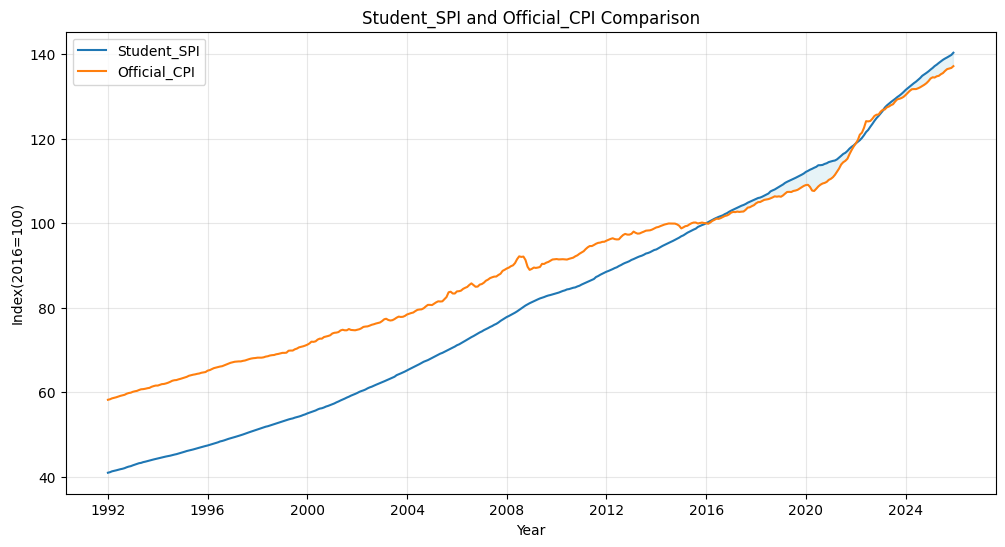

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df_index.index, df_index['Student_SPI'], label='Student_SPI')
plt.plot(df_index.index, df_index['Official_CPI'], label='Official_CPI')
plt.title('Student_SPI and Official_CPI Comparison')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Index(2016=100)')
plt.grid(True, alpha=0.3)

plt.fill_between(df_index.index, df_index['Official_CPI'],df_index['Student_SPI'],
                 where=df_index['Student_SPI']>df_index['Official_CPI'], alpha=0.3, color='lightblue', interpolate=True)
plt.show()

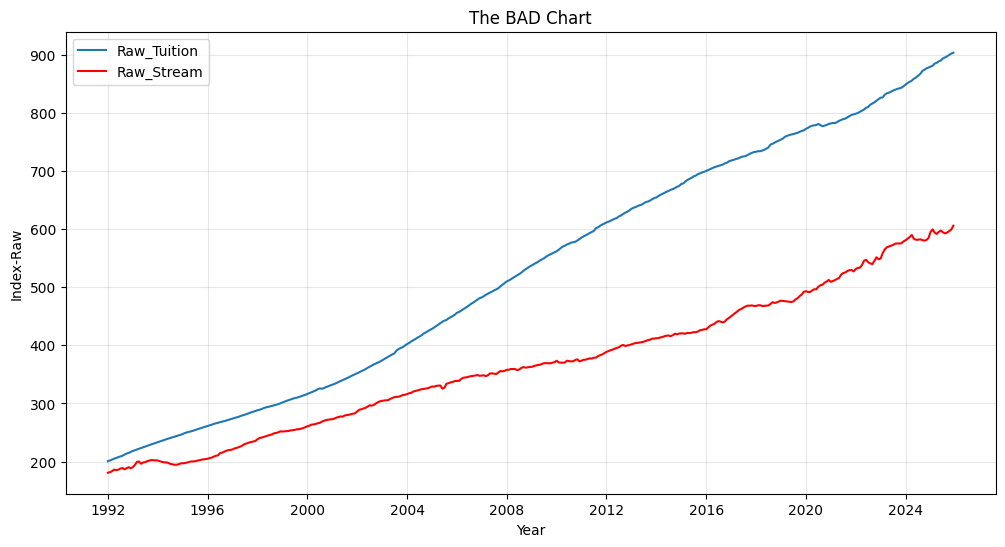

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Tuition'], label='Raw_Tuition')
plt.plot(df.index, df['Cable_Stream_TV'],label='Raw_Stream', color="red")
plt.title('The BAD Chart')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Index-Raw')
plt.grid(True, alpha=0.3)
plt.show()

Ans: The reason that comparing raw indices with different base years is a data crime is due to the function of indices. To be specific, the 100 of index represents different informations thus the comparison is false under such condition. In other words, the index is not the value of the price, it is a setted base year and every series have different base year, which having different starting point(base year). For instance, 1982 vs 2002, each year have different base year, and the result of raw index does not mean that tuition is multiple times costly than Spotify(Streaming Service), instead the raw index represents the relative change comparing to its own base year. The correct way should be set a common base year, eg 2016 is 100, this would make the comparison meaningful. Therefore, such a false comparison would lead to a wrong conclusion, and it is misleading which eventually is the reason why it is a data crime.

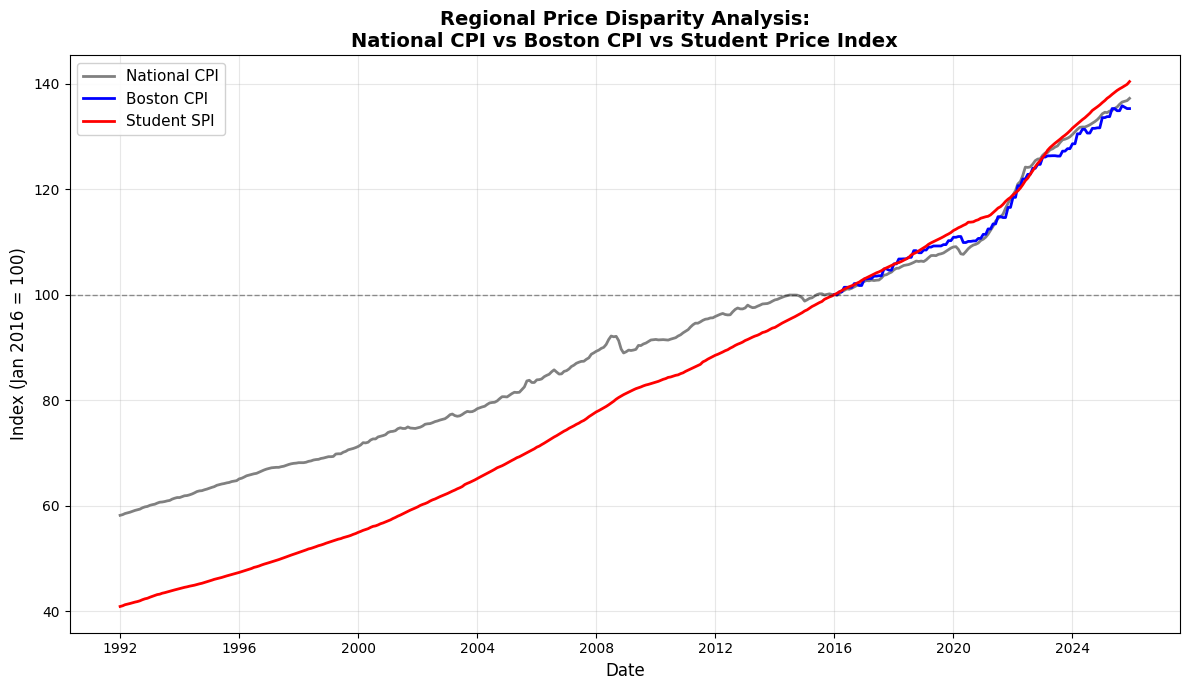


SUMMARY: Cumulative Price Growth Since Jan 2016
National CPI:  137.2  (+37.2%)
Boston CPI:    135.3  (+35.3%)
Student SPI:   140.4  (+40.4%)


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Initialize FRED API (replace with your API key)
fred = Fred(api_key='5bbdb79514a016ad379601c49181d548')

# =============================================================================
# Fetch Boston CPI data from FRED
# Series: Consumer Price Index for All Urban Consumers: All Items
#         in Boston-Cambridge-Newton, MA-NH (CBSA)
# =============================================================================
BOSTON_CPI_CODE = 'CUURA103SA0'

boston_cpi_raw = fred.get_series(BOSTON_CPI_CODE, observation_start='2016-01-01')
boston_cpi_raw = boston_cpi_raw.to_frame(name='Boston_CPI_Raw')

# =============================================================================
# Re-index Boston CPI so January 1, 2016 = 100
# =============================================================================
# Find the base value (Jan 2016) - handle bimonthly data
jan_2016_value = boston_cpi_raw.loc['2016-01':'2016-01', 'Boston_CPI_Raw']
if jan_2016_value.empty:
    # If Jan 2016 not available, use first available 2016 value
    jan_2016_value = boston_cpi_raw.loc['2016', 'Boston_CPI_Raw'].iloc[0]
else:
    jan_2016_value = jan_2016_value.iloc[0]

boston_cpi_raw['Boston_CPI'] = (boston_cpi_raw['Boston_CPI_Raw'] / jan_2016_value) * 100

# =============================================================================
# Handle missing values (Boston CPI is bimonthly - forward fill gaps)
# =============================================================================
boston_cpi = boston_cpi_raw[['Boston_CPI']].resample('MS').first().ffill()

# =============================================================================
# Merge with existing DataFrame
# Use df_index (normalized data) which contains 'Official_CPI' and 'Student_SPI'
# =============================================================================
# Align Boston data with your existing df_index
df_merged = df_index.join(boston_cpi, how='left')
df_merged['Boston_CPI'] = df_merged['Boston_CPI'].ffill()  # Fill remaining gaps

# =============================================================================
# Plot all three series
# =============================================================================
fig, ax = plt.subplots(figsize=(12, 7))

# National CPI (Grey)
ax.plot(df_merged.index, df_merged['Official_CPI'],
        color='grey', linewidth=2, label='National CPI')

# Boston CPI (Blue)
ax.plot(df_merged.index, df_merged['Boston_CPI'],
        color='blue', linewidth=2, label='Boston CPI')

# Student SPI (Red)
ax.plot(df_merged.index, df_merged['Student_SPI'],
        color='red', linewidth=2, label='Student SPI')

# =============================================================================
# Formatting
# =============================================================================
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Index (Jan 2016 = 100)', fontsize=12)
ax.set_title('Regional Price Disparity Analysis:\nNational CPI vs Boston CPI vs Student Price Index',
             fontsize=14, fontweight='bold')

# Clear legend with all three series labeled
ax.legend(loc='upper left', fontsize=11, framealpha=0.9)

ax.grid(True, alpha=0.3)
ax.axhline(y=100, color='black', linestyle='--', alpha=0.4, linewidth=1)

plt.tight_layout()
plt.show()

# =============================================================================
# Summary Statistics
# =============================================================================
print("\n" + "="*60)
print("SUMMARY: Cumulative Price Growth Since Jan 2016")
print("="*60)
latest = df_merged.dropna().iloc[-1]
print(f"National CPI:  {latest['Official_CPI']:.1f}  ({latest['Official_CPI']-100:+.1f}%)")
print(f"Boston CPI:    {latest['Boston_CPI']:.1f}  ({latest['Boston_CPI']-100:+.1f}%)")
print(f"Student SPI:   {latest['Student_SPI']:.1f}  ({latest['Student_SPI']-100:+.1f}%)")

Note: The comparison starts at 2016